In [54]:
'''
Importing useful libraries
'''
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sea

In [4]:
#Read the dataset
data = pd.read_csv("./Dataset/UCI_WineQuality.csv")

In [10]:
#Show the data i.e. default is 5, can be changed by n = 6 or 13 etc.
data.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [11]:
#Show the statistics i.e. mean, std, max, lower, upper percentile values
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [12]:
#Show the dataset summary
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
type                    6497 non-null object
fixed acidity           6487 non-null float64
volatile acidity        6489 non-null float64
citric acid             6494 non-null float64
residual sugar          6495 non-null float64
chlorides               6495 non-null float64
free sulfur dioxide     6497 non-null float64
total sulfur dioxide    6497 non-null float64
density                 6497 non-null float64
pH                      6488 non-null float64
sulphates               6493 non-null float64
alcohol                 6497 non-null float64
quality                 6497 non-null int64
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [13]:
#Detecting missing or null values in the dataset
data.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [31]:
#For such features who have null/missing values, 
#We will add mean values in it. 
#Number of occurance of that value for specific feature

data['fixed acidity'].value_counts()

#data['volatile acidity'].value_counts()
#data['citric acid'].value_counts()
#data['residual sugar'].value_counts()
#data['chlorides'].value_counts()
#data['pH'].value_counts()
#data['sulphates'].value_counts()


6.80     354
6.60     326
6.40     305
7.00     282
6.90     279
        ... 
15.90      1
12.10      1
14.20      1
3.80       1
6.45       1
Name: fixed acidity, Length: 107, dtype: int64

In [32]:
mean_fa = data['fixed acidity'].mean()
data['fixed acidity'].fillna(mean_fa, inplace = True)
data['fixed acidity'].isnull().sum()

0

In [35]:
data['volatile acidity'].value_counts()

0.280    286
0.240    265
0.260    255
0.250    238
0.220    235
        ... 
0.805      1
1.130      1
1.185      1
0.565      1
0.865      1
Name: volatile acidity, Length: 187, dtype: int64

In [36]:
mean_va = data['volatile acidity'].mean()
data['volatile acidity'].fillna(mean_va, inplace = True)
data['volatile acidity'].isnull().sum()

0

In [37]:
data['citric acid'].value_counts()


0.30    337
0.28    301
0.32    289
0.49    283
0.26    257
       ... 
1.23      1
0.75      1
0.86      1
0.99      1
0.88      1
Name: citric acid, Length: 90, dtype: int64

In [38]:
mean_ca = data['citric acid'].mean()
data['citric acid'].fillna(mean_ca, inplace = True)
data['citric acid'].isnull().sum()

0

In [39]:
data['residual sugar'].value_counts()

2.00     235
1.80     228
1.60     223
1.40     219
1.20     195
        ... 
14.15      1
14.05      1
3.15       1
8.95       1
20.30      1
Name: residual sugar, Length: 316, dtype: int64

In [43]:
mean_rs = data['residual sugar'].mean()
data['residual sugar'].fillna(mean_rs, inplace = True)
data['residual sugar'].isnull().sum()

0

In [44]:
data['chlorides'].value_counts()

0.044    206
0.036    200
0.042    187
0.046    185
0.050    182
        ... 
0.213      1
0.165      1
0.150      1
0.144      1
0.125      1
Name: chlorides, Length: 214, dtype: int64

In [45]:
mean_c = data['chlorides'].mean()
data['chlorides'].fillna(mean_c, inplace = True)
data['chlorides'].isnull().sum()

0

In [46]:
data['pH'].value_counts()


3.16    200
3.14    193
3.22    185
3.20    176
3.19    170
       ... 
3.81      1
2.77      1
2.82      1
2.84      1
3.82      1
Name: pH, Length: 108, dtype: int64

In [47]:
mean_pH = data['pH'].mean()
data['pH'].fillna(mean_pH, inplace = True)
data['pH'].isnull().sum()

0

In [48]:
data['sulphates'].value_counts()

0.50    275
0.46    243
0.54    234
0.44    232
0.38    214
       ... 
1.59      1
1.12      1
1.33      1
1.56      1
1.62      1
Name: sulphates, Length: 111, dtype: int64

In [51]:
mean_s = data['sulphates'].mean()
data['sulphates'].fillna(mean_s, inplace = True)
data['sulphates'].isnull().sum()

0

In [52]:
#Verifying for missing or null values in the dataset
data.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

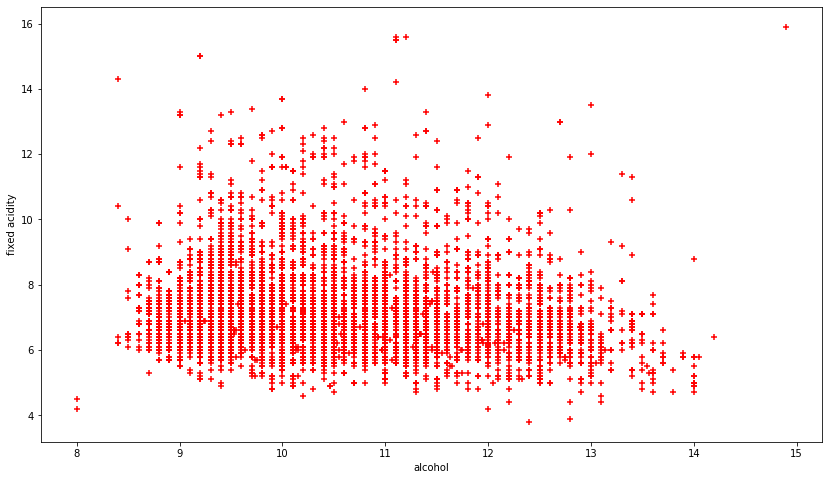

In [57]:
'''
Visualization of the data
x - alcohol
y - fixed acidity
'''
plt.figure(figsize=(14, 8))
plt.scatter(x = 'alcohol', y = 'fixed acidity', data = data, marker = '+', c='r')
plt.xlabel('alcohol')
plt.ylabel('fixed acidity')
plt.show()

[]

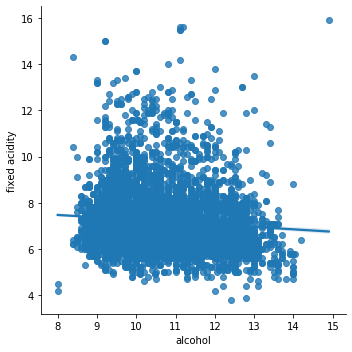

In [66]:
#Finding linear relationship in this two features
sea.lmplot(x='alcohol', y='fixed acidity', data = data)
plt.plot()

In [ ]:
'''
x - volatile acidity
y - alcohol
'''

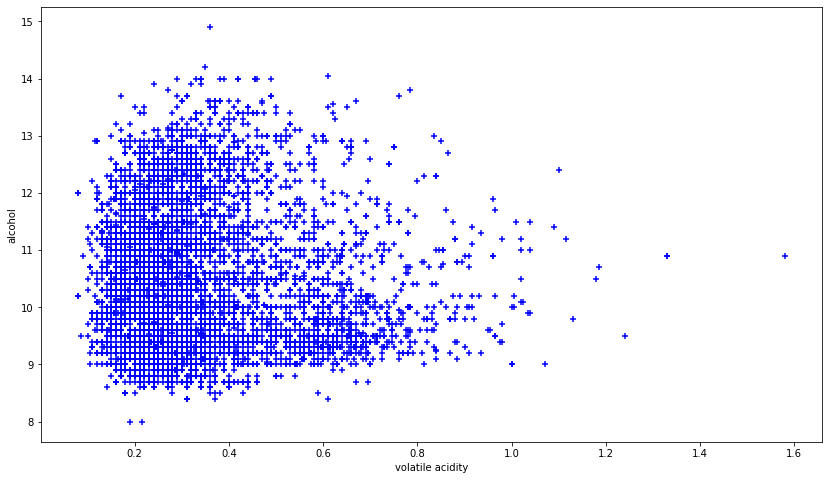

In [67]:
plt.figure(figsize=(14,8))
plt.scatter(x ='volatile acidity', y = 'alcohol', data = data, marker = '+', c = 'b')
plt.xlabel('volatile acidity')
plt.ylabel('alcohol')
plt.show()

[]

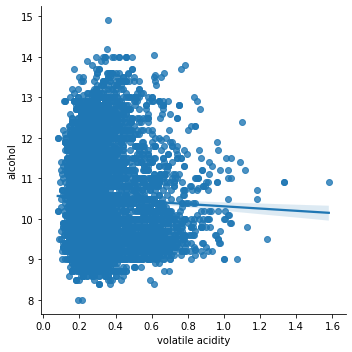

In [68]:
sea.lmplot(x='volatile acidity', y='alcohol', data = data)
plt.plot()

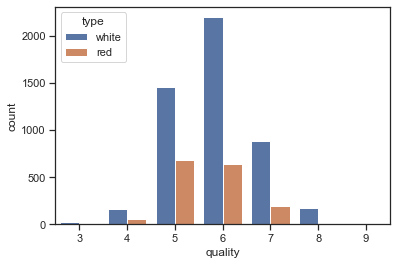

In [72]:
sea.set(style = 'ticks')
sea.countplot(data['quality'], hue = 'type', data = data)
plt.show()

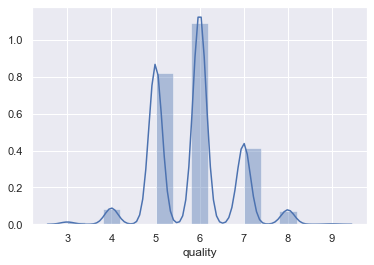

In [82]:
'''
Distribution
'''
sea.set()
sea.distplot(data['quality'], bins = 15)
plt.show()

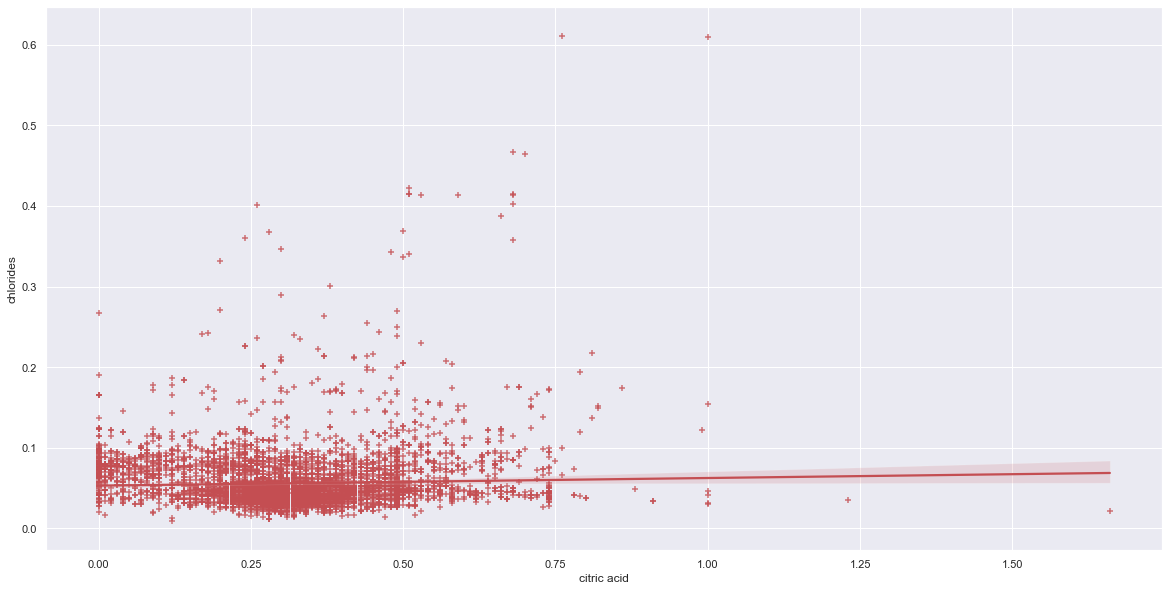

In [88]:
plt.figure(figsize = (20, 10))
sea.regplot(x = 'citric acid', y = 'chlorides', data = data, marker = '+', color = 'r')
plt.show()

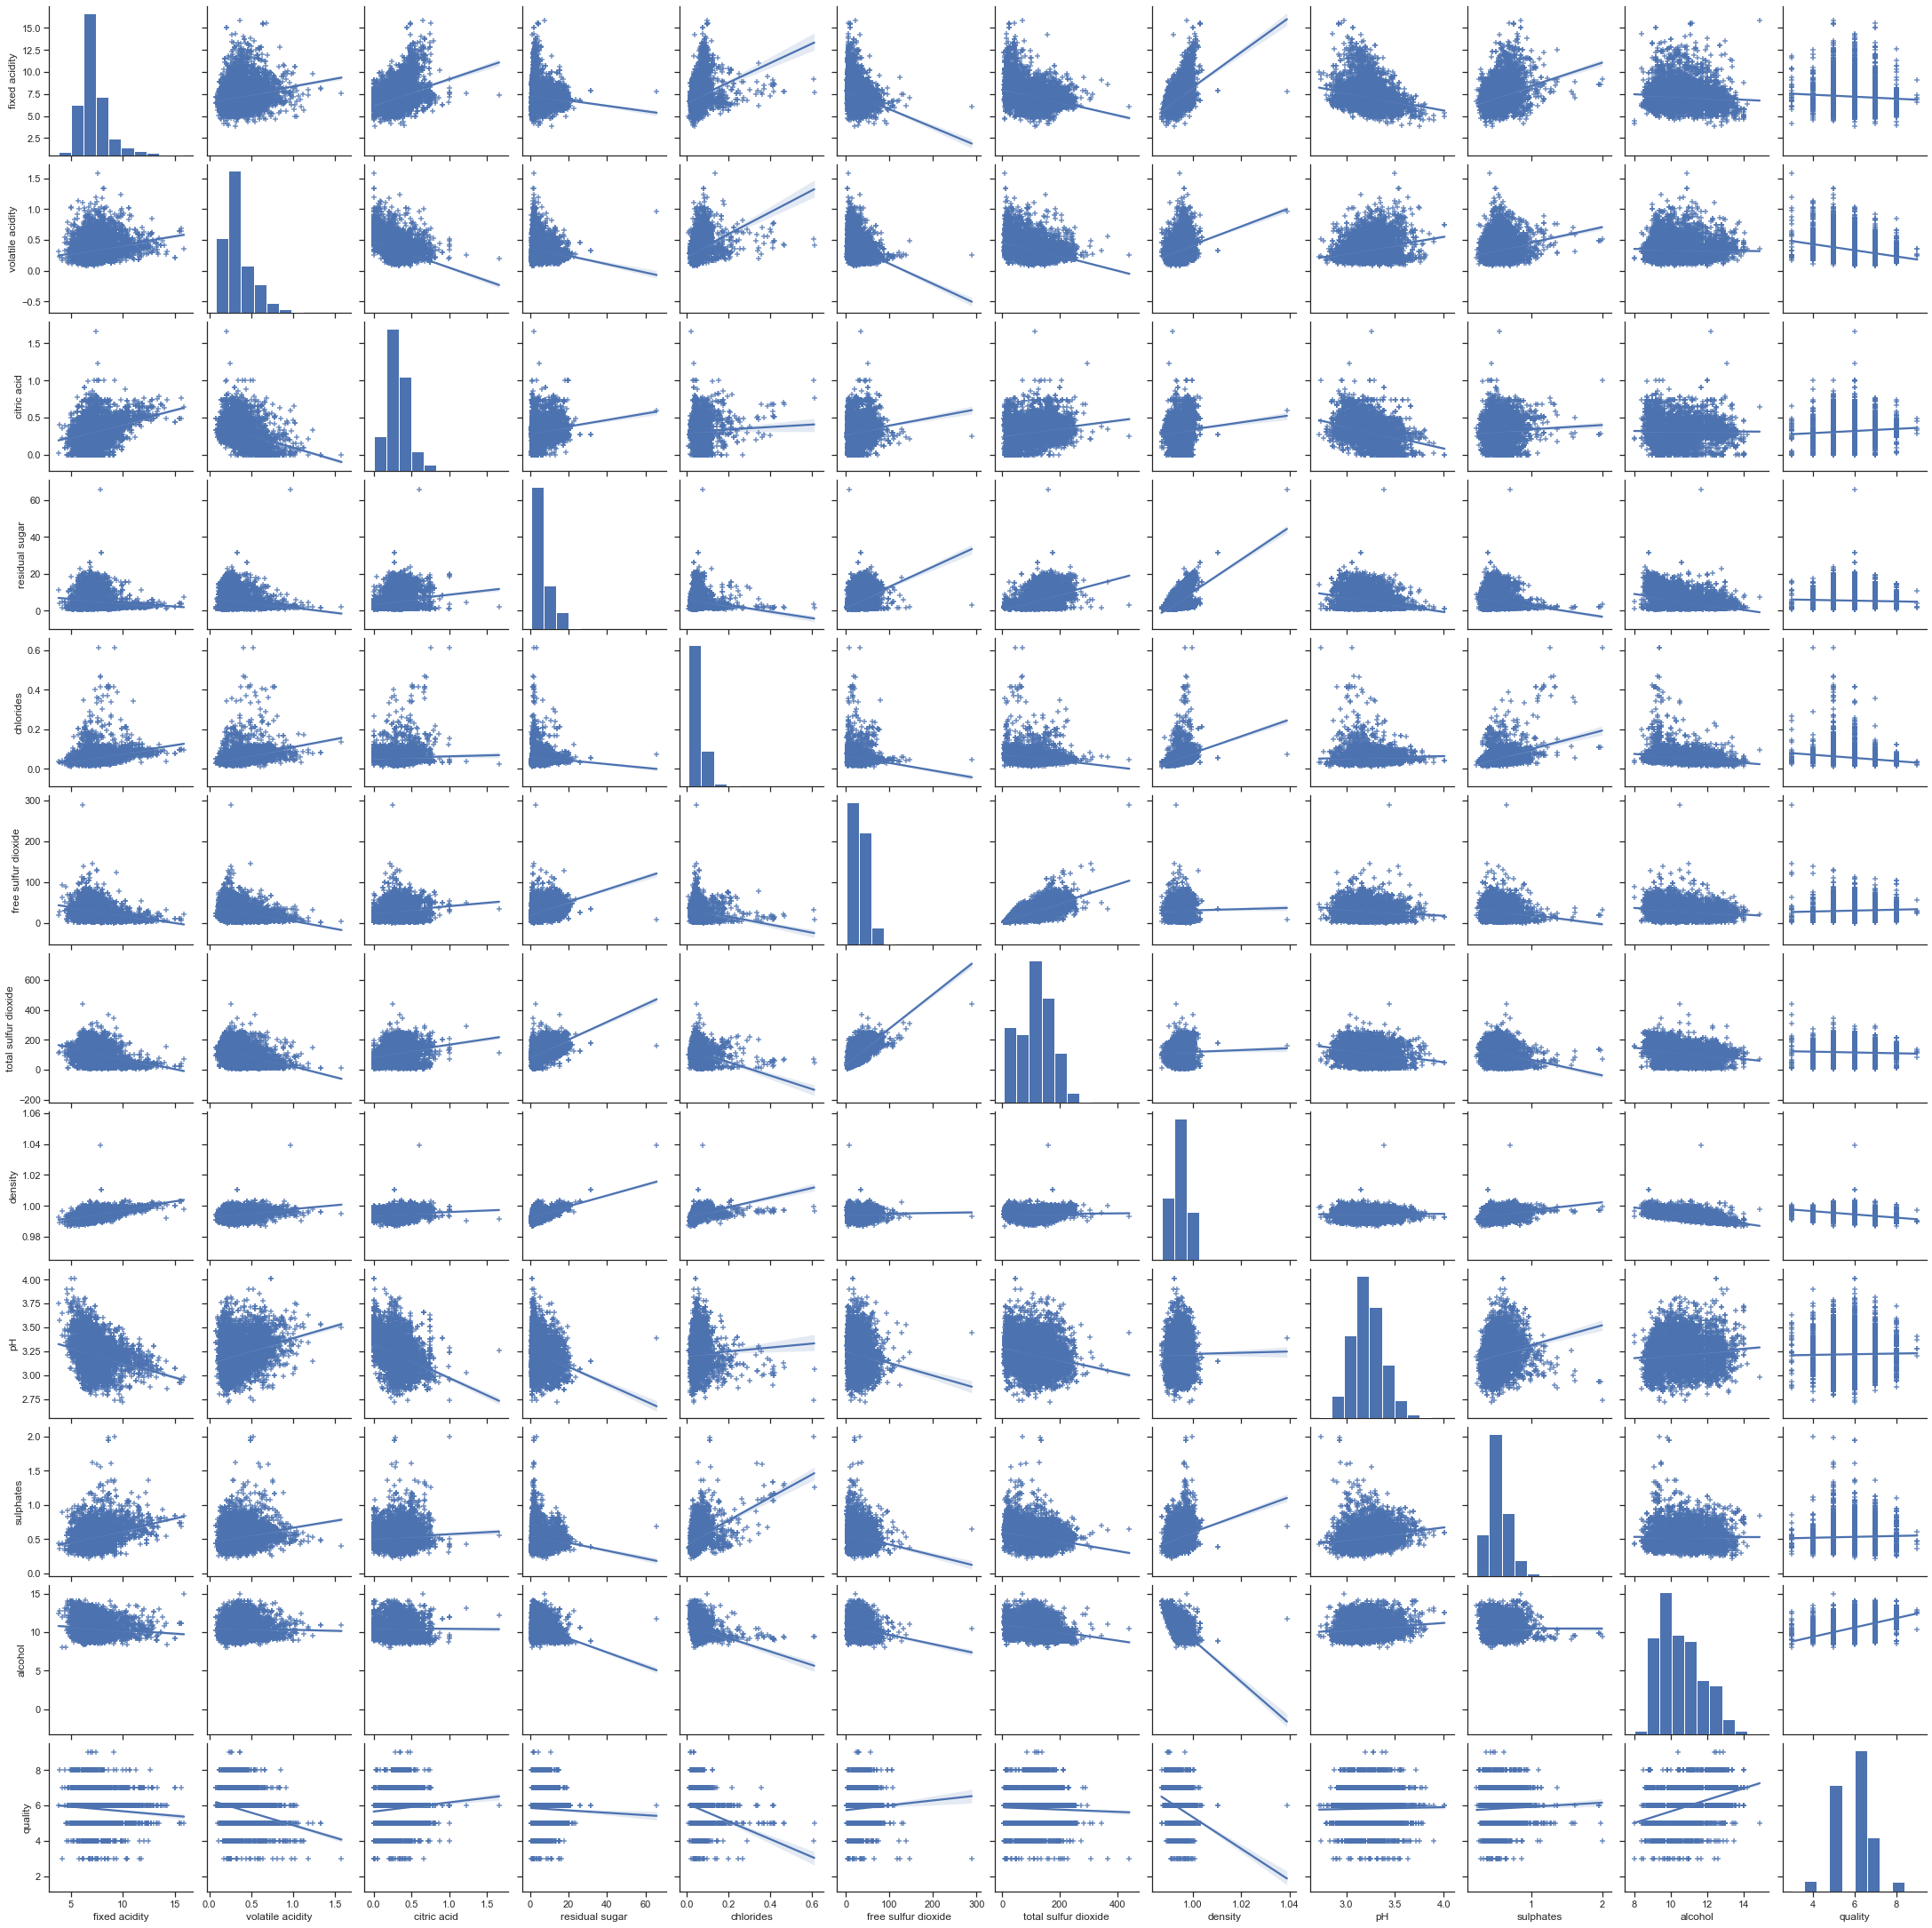

In [96]:
sea.set(style = 'ticks')
sea.pairplot(data, markers = ['+'], kind = 'reg')
plt.show()